In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

plt.style.use('bmh')

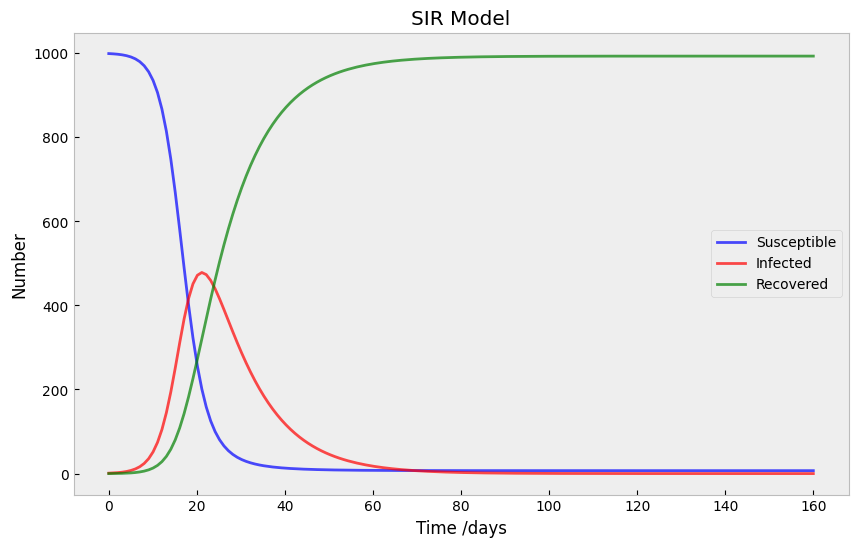

In [ ]:


# Total population, N
N = 1000
# Initial number of infected and recovered individuals, I0 and R0
I0 = 1
R0 = 0
# Everyone else is susceptible to infection initially
S0 = N - I0 - R0

# Contact rate, beta, and mean recovery rate, gamma, (in 1/days)
beta = 0.5
gamma = 0.1

# Time grid (in days)
t = np.linspace(0, 160, 160)

# The SIR model differential equations
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Initial conditions vector
y0 = S0, I0, R0

# Integrate the SIR equations over the time grid, t
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(t, S, 'b', alpha=0.7, linewidth=2, label='Susceptible')
plt.plot(t, I, 'r', alpha=0.7, linewidth=2, label='Infected')
plt.plot(t, R, 'g', alpha=0.7, linewidth=2, label='Recovered')
plt.xlabel('Time /days')
plt.ylabel('Number')
plt.title('SIR Model')
plt.legend()
plt.grid()
plt.savefig('../images/sir_model.png', dpi=300)
plt.show()
